In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [100]:
df=pd.read_csv('Social_Network_Ads.csv')

In [101]:
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [102]:
df=df.iloc[:,2:]

In [103]:
df.sample(5)

,Age,EstimatedSalary,Purchased
287,48,138000,1
328,36,118000,1
217,40,78000,0
70,25,80000,0
196,30,79000,0


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [19]:
x_train.shape , x_test.shape

((280, 2), (120, 2))

In [20]:
df.shape

(400, 3)

# StandardScaler

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(x_train)

StandardScaler()

In [28]:
x_train_scaled=scaler.transform(x_train)

In [39]:
x_test_scaled=scaler.transform(x_test)

In [30]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [31]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [32]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [34]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)

In [40]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

# check Before and After mean and std

In [36]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [37]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


# Effect of Scaling

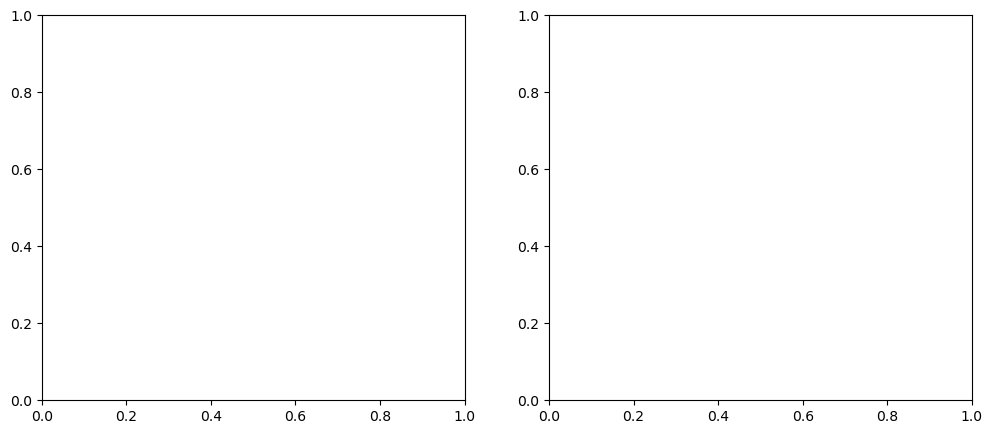

In [41]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

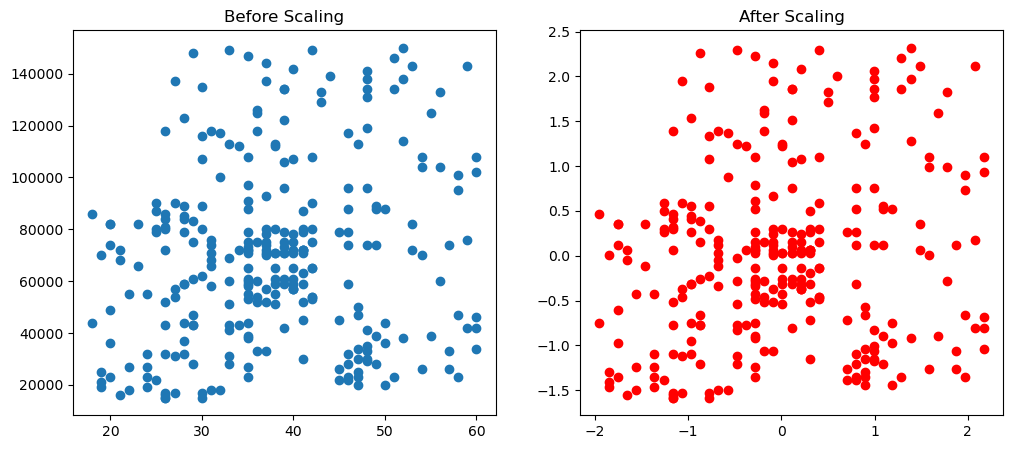

In [52]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')

plt.show()

# Another Graph

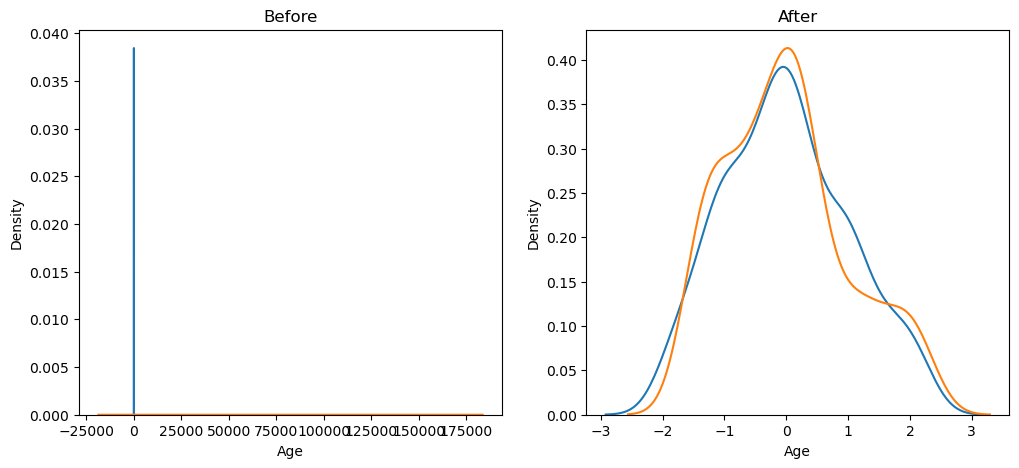

In [63]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

# comper single col Before and After

<Axes: title={'center': 'Before'}, xlabel='Age', ylabel='Density'>

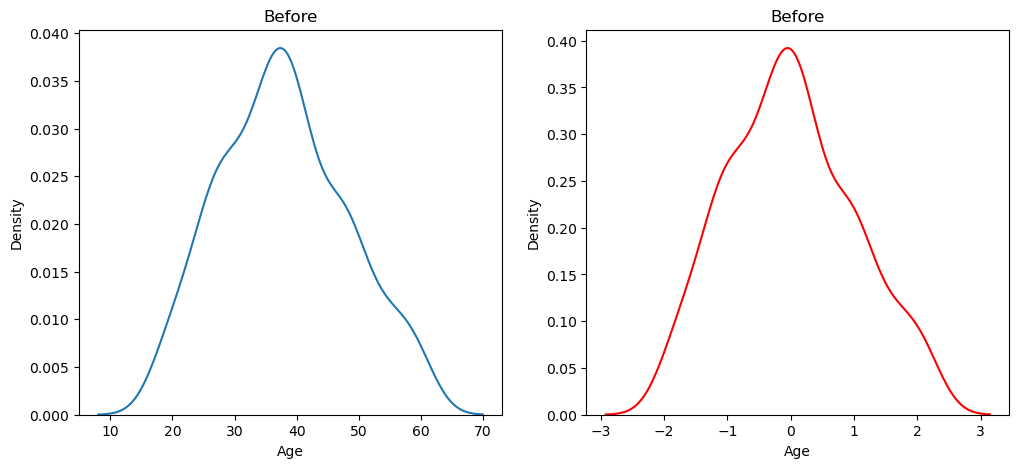

In [106]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before')
sns.kdeplot(x_train['Age'],ax=ax1)


ax2.set_title('Before')
sns.kdeplot(x_train_scaled['Age'],ax=ax2,color='red')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

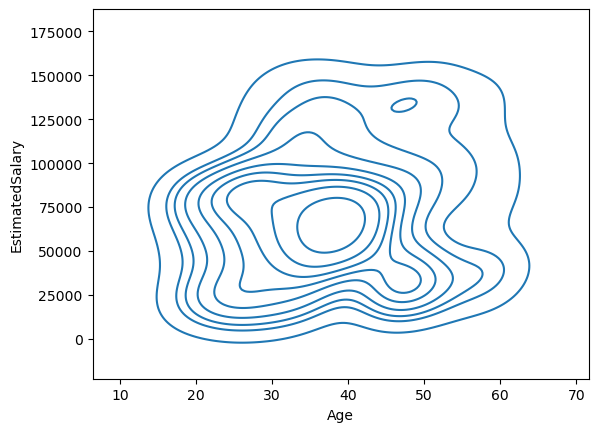

In [81]:
sns.kdeplot(x='Age',y='EstimatedSalary',data=df)

# Why  Scaling is Important

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
ir=LogisticRegression()
ir_scaled=LogisticRegression()

In [85]:
ir.fit(x_train,y_train)
ir_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [86]:
y_pred=ir.predict(x_test)
y_scaled_pred=ir_scaled.predict(x_test_scaled)

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
print('Before',accuracy_score(y_test,y_pred))
print('After',accuracy_score(y_test,y_scaled_pred))

Before 0.875
After 0.8666666666666667


In [98]:
x_train_scaled.shape

(280, 2)